# Regression Algorithm: Golden Apple Price Prediction

## **Introduction**

The prices of Fresh Produce depend on a large number of factors which contribute to changes in the supply and demand. One of the factors that affect pricing is the amount of apples yielded in a season.  

The main aim of this project is to develop a model that predicts prices of Golden Apples per kilogram in order for the Fresh Produce industry to meet its objectives. The industry aims to ensure there is adequate stock to cater for the demand of golden apples and simultaneously mitigate the amount of stock in hand to avoid any losses or waste. To achieve this, we will identify and collect data that is relevant to the past production and pricing of apples and build a regression algorithm that is able to forecast future golden apple prices.  

## **Overview**

This dataset consists of over 60 000 sales made by Durban Fresh Produce Market. Below is a description of Variable names used in the dataset:

- avg_price_per_kg - average price of the produce per kg (the response)
- Province - Which province the produce was grown
- Container - The code for the type of container
- Size_Grade - The class of the produce according to their quality
- Weight_Kg - The total weight in kilograms
- Commodities - The type of produce, e.g. Golden Delicious Apples
- Date - The date of the sale
- Sales_Total - The total sales price
- Total_Qty_Sold - The number of produce sold
- Total_Kg_Sold - The total weight of the produce sold in kilograms
- Stock_On_Hand - The amount of produce the store has

## **Import Dependencies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline     
sns.set(color_codes=True)

## **Load Data**

In [3]:
train = pd.read_csv('data/df - train_set.csv')
test = pd.read_csv('data/df - test_set.csv')
train = train[train.Commodities == 'APPLE GOLDEN DELICIOUS']

## **Data Cleaning**


### **Data Overview**
Before studying the dataframe we need to remove the Commodities Column as it contains one item "APPLE GOLDEN DELICIOUS"


In [4]:
train.drop("Commodities",inplace=True,axis=1)


Obtained the first 5 rows to get an idea of the type of data we are dealing with.

In [5]:
train.head()


,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


We studied the structure of our data. We retrieved the dimension, the various column names, their respective counts and data types. The data consist of 1952 rows and 12 columns. The columns consist of 8 numerical features, 3 categorical features and 1 date feature still in string format. The number of rows is the same as the number of values in each column so we can assume that the data does not contain any missing values.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Date              1952 non-null   object 
 5   Low_Price         1952 non-null   float64
 6   High_Price        1952 non-null   float64
 7   Sales_Total       1952 non-null   float64
 8   Total_Qty_Sold    1952 non-null   int64  
 9   Total_Kg_Sold     1952 non-null   float64
 10  Stock_On_Hand     1952 non-null   int64  
 11  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


We counted the number of unique values in each column.The data consists of 7 different provinces, 11 container types and 10 different size_grade. Furthermore we discovered that the data was collected over 147 different days

In [7]:
train.nunique()


Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

## **Exploratory Data Analysis**

### **Numerical Variables**

We obtained the summary statistics of all the numerical columns. From the table below, it is evident that all our independent numerical features are extremely skewed to the right. Their means are significantly higher than their mean. This indicates that more of the observations are to the left of the mean and that there are a couple of values to the extreme right. The response (avg_price_per_kg)

In [8]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Furthermore we plotted the histograms of all the numerical variables, and they confirmed the above findings.

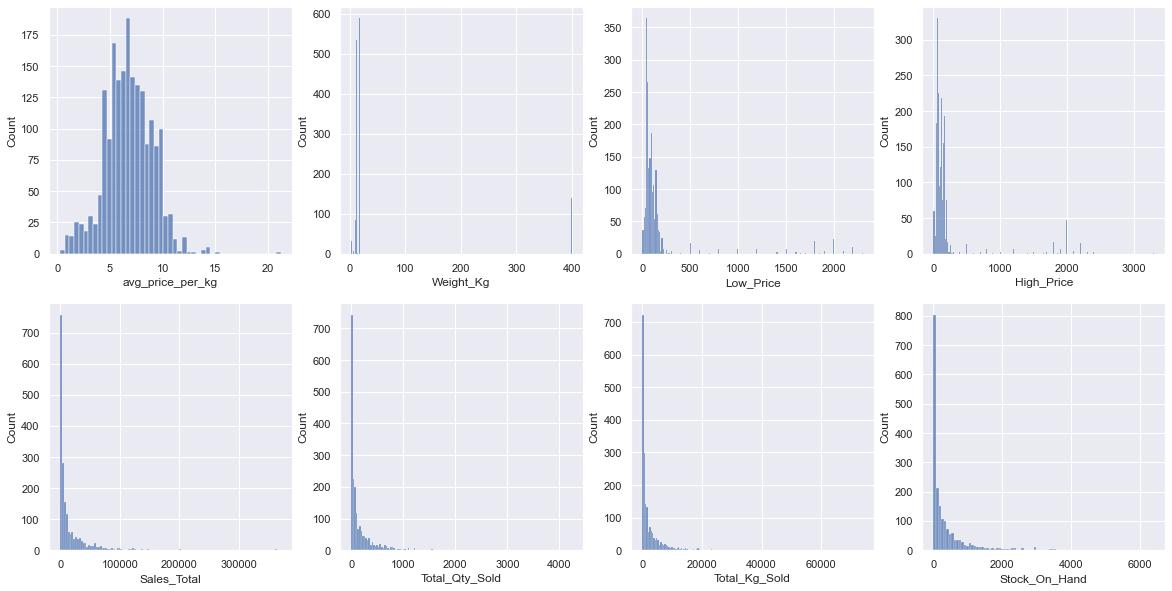

In [9]:

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.histplot(train.avg_price_per_kg,ax=axs[0,0])
sns.histplot(train.Weight_Kg,ax=axs[0,1])
sns.histplot(train.Low_Price,ax=axs[0,2])
sns.histplot(train.High_Price,ax=axs[0,3])
sns.histplot(train.Sales_Total,ax=axs[1,0])
sns.histplot(train.Total_Qty_Sold,ax=axs[1,1])
sns.histplot(train.Total_Kg_Sold,ax=axs[1,2])
sns.histplot(train.Stock_On_Hand,ax=axs[1,3])

plt.show()


Now let us evaluate whether time has an effect on our avg_price_per_kg

In [10]:
train['Date'] = pd.to_datetime(train['Date']) #converting to datetime
    

In [12]:
df = train.groupby(train['Date'])['avg_price_per_kg'].mean() #getting the average_per_kg_per_date

Text(0.5, 0, 'Date')

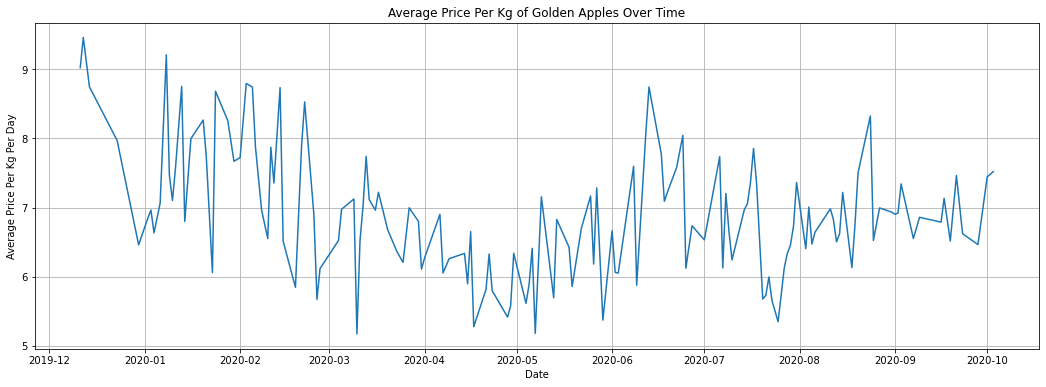

In [36]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df)
ax.grid(True)
ax.set_title('Average Price Per Kg of Golden Apples Over Time')
ax.set_ylabel('Average Price Per Kg Per Day')
ax.set_xlabel('Date')


We checked how each of the numerical features is related to the avg_price_per_kg and discovered

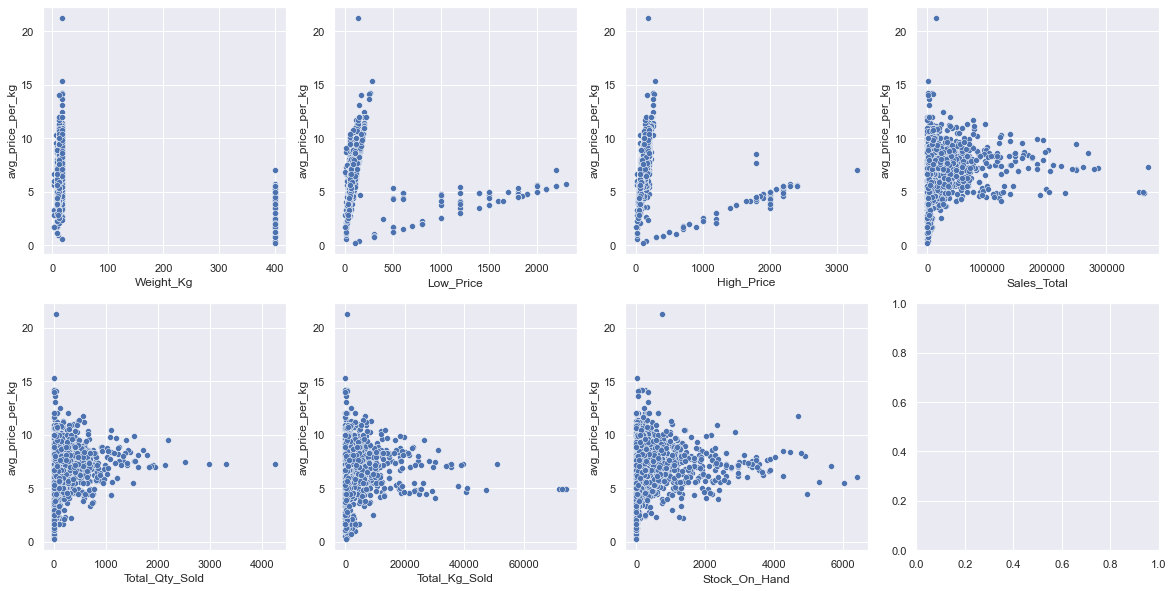

In [13]:

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.scatterplot(x = 'Weight_Kg',y = 'avg_price_per_kg',ax=axs[0,0],data = train)
sns.scatterplot(x = 'Low_Price',y = 'avg_price_per_kg',ax=axs[0,1],data = train)
sns.scatterplot(x = 'High_Price',y = 'avg_price_per_kg', ax=axs[0,2],data = train)
sns.scatterplot(x = 'Sales_Total',y = 'avg_price_per_kg',ax=axs[0,3],data = train)
sns.scatterplot(x = 'Total_Qty_Sold',y = 'avg_price_per_kg',ax=axs[1,0],data = train)
sns.scatterplot(x = 'Total_Kg_Sold',y = 'avg_price_per_kg',ax=axs[1,1],data = train)
sns.scatterplot(x = 'Stock_On_Hand',y = 'avg_price_per_kg',ax=axs[1,2], data = train)

plt.show()

We constructed a correlation heatmap for the numerical variables to check if any linear relationships exist between our response variables and independent features, and between the independent features themselves. We found that the independent variables have a low correlation with the response variable. Furthermore we discovered Weight_kg,Low_Price,and High_Price are highly positively correlated. The Sales_Total and Total_kg_Sold are also highly correlated. 

In [14]:
num_fil=['avg_price_per_kg','Weight_Kg','Low_Price','High_Price','Sales_Total', 'Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']
num_df=train[num_fil]

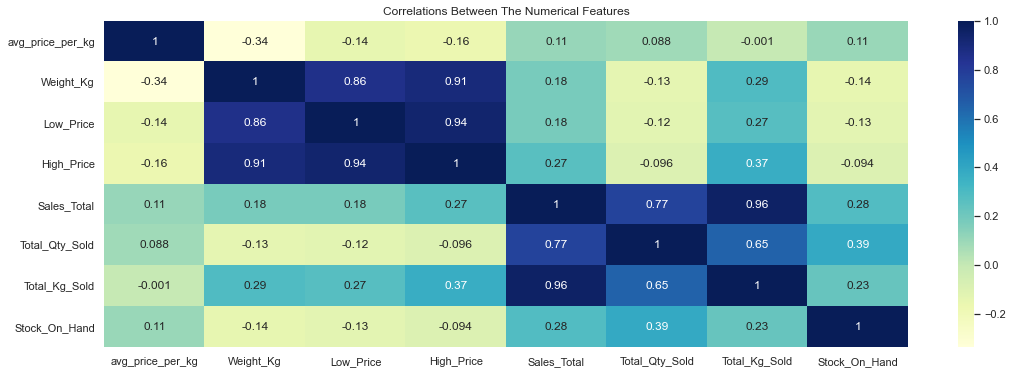

In [142]:
plt.figure(figsize = (18,6))
heat_map = sns.heatmap(num_df.corr(),annot=True, cmap="YlGnBu")
heat_map.set_title('Correlations Between The Numerical Features')
plt.show()


## **Categorical Variables**

We plotted the count of each category
Most of the apples are produced in the CAPE region. Orange Free state produced the least number of apples. 

1S size_grade is the most produced


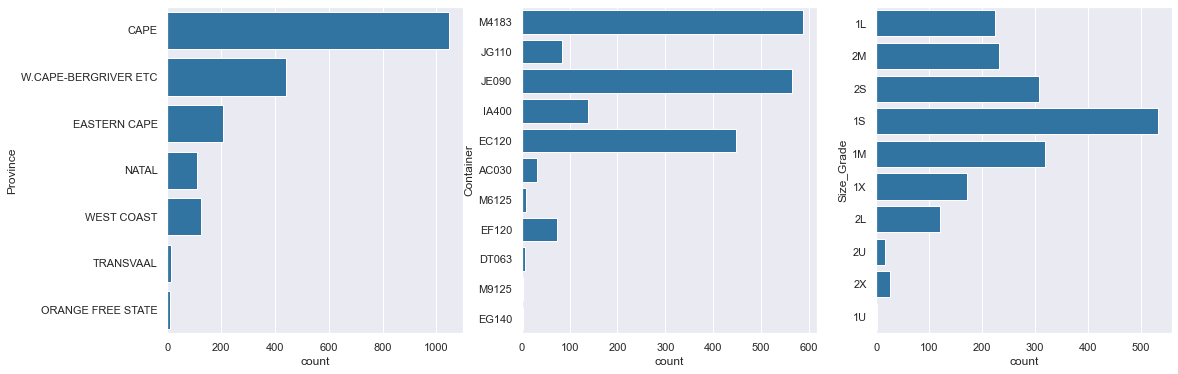

In [15]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))
sns.countplot(y = 'Province',data = train, ax=axs[0],color='#1f77b4')
sns.countplot(y = 'Container', ax=axs[1],data = train,color='#1f77b4')
sns.countplot(y = 'Size_Grade', ax=axs[2],data = train,color='#1f77b4')
plt.show()


In [ ]:
The th


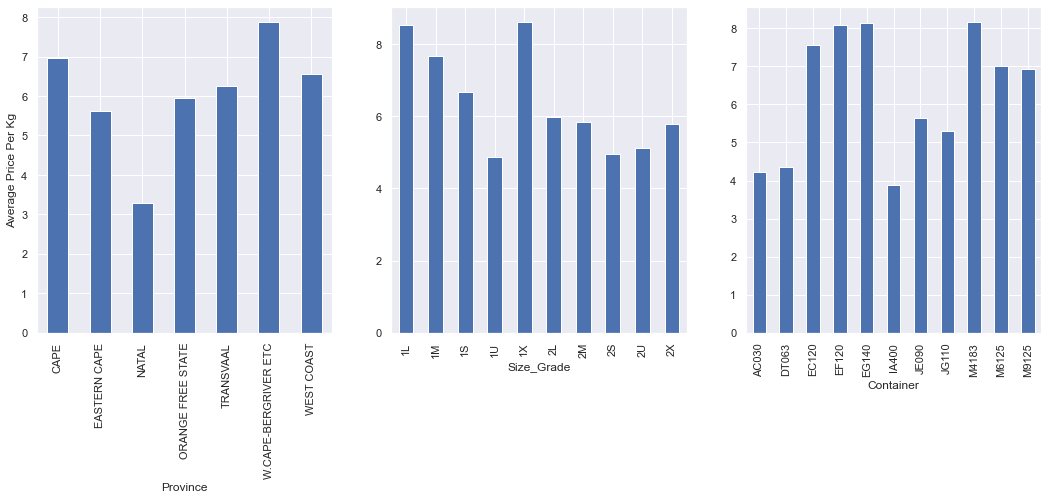

In [16]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))

pro=train.groupby(train['Province'])['avg_price_per_kg'].mean().plot(kind='bar', ax=axs[0])
train.groupby(train['Size_Grade'])['avg_price_per_kg'].mean().plot(kind='bar',ax=axs[1])
train.groupby(train['Container'])['avg_price_per_kg'].mean().plot(kind='bar',ax=axs[2])
pro.set_ylabel("Average Price Per Kg")

plt.show()


## **Feature Engineering**


Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

### **Encoding Categorical Variables**


Machine learning models requires all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. **get_dummies()** is used for data manipulation. It converts categorical data into dummy or indicator variables.

<img src="Images/Encoding_example.jpeg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

In [17]:
df = train.copy()

In [18]:
df_final = pd.get_dummies(df,drop_first=True)

In [19]:
df_final.head(10)

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,0,...,0,0,0,0,0,0,1,0,0,0
24,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,0,...,0,0,0,0,0,0,0,1,0,0
40,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,0,...,0,0,1,0,0,0,0,0,0,0
69,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,...,0,0,1,0,0,0,0,0,0,0
80,9.0,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,0,...,0,0,0,0,0,0,0,1,0,0
117,12.0,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33,0,...,0,1,0,0,0,0,0,0,0,0
122,11.0,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36,0,...,0,0,0,0,0,0,1,0,0,0
126,400.0,2020-07-21,800.0,800.0,1600.0,2,800.0,0,2.00,0,...,0,0,0,0,0,0,1,0,0,0
162,12.0,2020-04-22,104.0,104.0,2392.0,23,276.0,0,8.67,0,...,0,0,1,0,0,0,0,0,0,0
